<a href="https://colab.research.google.com/github/khalidme94/ML/blob/CH_7/Khalid_Almalki_Logistic_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Assignment

#### Dataset Options
1. Dog or horse
    - `https://github.com/gumdropsteve/datasets/raw/master/dog_or_horse.csv`
    - Note: target variable is `target`.
2. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target variable is `Churn`


Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

1. Load in your dataset through its CSV link.

In [2]:
df=pd.read_csv('https://github.com/gumdropsteve/datasets/raw/master/dog_or_horse.csv')

2. Find out some information about the data...

In [3]:
df.shape

(200, 4)

In [4]:
df.describe()

,height,weight,target
count,200.000000,200.000000,200.000000
mean,47.480000,106.830000,0.500000
std,18.415353,38.636836,0.501255
min,25.000000,40.000000,0.000000
25%,32.000000,80.000000,0.000000
50%,43.000000,99.000000,0.500000
75%,62.250000,141.000000,1.000000
max,84.000000,179.000000,1.000000


In [5]:
df.sample(5)

,height,weight,target,type
129,43.0,133.0,1.0,horse
43,34.0,42.0,0.0,dog
89,35.0,106.0,0.0,dog
169,64.0,128.0,1.0,horse
159,72.0,137.0,1.0,horse


In [6]:
df.value_counts()

height  weight  target  type 
35.0    68.0    0.0     dog      2
72.0    143.0   1.0     horse    2
27.0    92.0    0.0     dog      2
34.0    55.0    0.0     dog      2
65.0    119.0   1.0     horse    2
                                ..
52.0    176.0   1.0     horse    1
51.0    178.0   1.0     horse    1
        174.0   1.0     horse    1
50.0    177.0   1.0     horse    1
25.0    44.0    0.0     dog      1
Length: 193, dtype: int64

In [7]:
df.describe(exclude='number')

,type
count,200
unique,2
top,dog
freq,100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  200 non-null    float64
 1   weight  200 non-null    float64
 2   target  200 non-null    float64
 3   type    200 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


Checking for Outliers

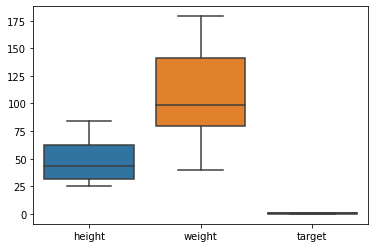

In [9]:
sns.boxplot(data=df)

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [10]:
corr=df.corr()
corr

,height,weight,target
height,1.000000,0.703149,0.842168
weight,0.703149,1.000000,0.771663
target,0.842168,0.771663,1.000000


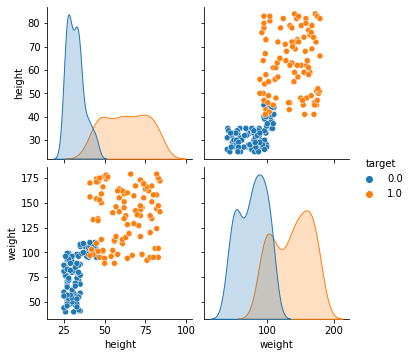

In [11]:
sns.pairplot(df,hue='target')

In [12]:
corr.style.background_gradient(cmap='coolwarm')

,height,weight,target
height,1.000000,0.703149,0.842168
weight,0.703149,1.000000,0.771663
target,0.842168,0.771663,1.000000


4. Split your data into training and testing datasets...

In [13]:
col=['height']
X=df[col]
y=df['target']

X_train,  X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

5. Import, create, and fit a LogisticRegression model with 1 variable

In [14]:
lr=LogisticRegression(fit_intercept=True,
                      warm_start=False)

In [15]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [16]:
pred=lr.predict(X_test)
pred

array([1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0.])

In [17]:
# what do they look like? (show me some of the predictions)


7. Score your model...
- accuracy_score
- confusion_matrix

In [18]:
accuracy_score(y_test,pred)

0.9333333333333333

In [19]:
confusion_matrix(y_test,pred)

array([[29,  1],
       [ 3, 27]])

8. Create, and fit a LogisticRegression model with **more than** 1 variable

In [20]:
col=['height','weight']
X=df[col]
y=df['target']

X_train,  X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [21]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

9. Make predictions on your `X_test` values...

In [22]:
pred=lr.predict(X_test)
pred

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [23]:
# what do they look like? (show me some of the predictions)


10. Score your model...
- accuracy_score
- confusion_matrix

In [24]:
accuracy_score(y_test,pred)

0.9333333333333333

In [25]:
confusion_matrix(y_test,pred)

array([[25,  0],
       [ 4, 31]])

11. Which model is better? Why?

The second model is better as scores raised. It is convencing as both features have good correlation with the target.

12. Perform GridSearchCV with the better data

In [26]:


p_grid = {'fit_intercept': [True, False],
          'warm_start': [True, False]}

grid = GridSearchCV(lr, p_grid,cv=10)



In [27]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
grid.best_params_

{'fit_intercept': True, 'warm_start': True}

In [29]:
grid.best_score_

0.9928571428571429

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [30]:
lr=LogisticRegression(fit_intercept=True,
                      warm_start=True)

In [31]:
%time lr.fit(X_train,y_train)

CPU times: user 17.7 ms, sys: 661 µs, total: 18.3 ms
Wall time: 19.8 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

14. Score the new model... 
- accuracy_score
- confusion_matrix

In [32]:
accuracy_score(y_test,pred)

0.9333333333333333

In [33]:
confusion_matrix(y_test,pred)

array([[25,  0],
       [ 4, 31]])

Did the score change at all? Why?

No, both scores are the same as the previous one

I think because it is a small dataset and that does not effect the score much.

## Bonus
Set up a SGDClassifier, score it, etc... https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Note: you may need more or less code cells, but here's 5.

In [34]:
from sklearn.linear_model import SGDClassifier

In [35]:
lr_sgd= SGDClassifier(loss='log')

In [36]:
%time lr_sgd.fit(X_train,y_train)

CPU times: user 3.47 ms, sys: 0 ns, total: 3.47 ms
Wall time: 3.83 ms


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
accuracy_score(y_test,pred)

0.9333333333333333